> **Created by**: Hadi Najar

# Project: Visualization of the Bay Wheel (Lyft) system data

> Explore the **Bay wheels** system data for November 2019.

In [1]:
#importing necessary pacakges
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
sns.set() #set sns to default for now

#read the csv file and show the head of the data frame
file = '201911-baywheels-tripdata.csv'
df = pd.read_csv(file)
df.head()

C:\Users\a0226205\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,707,2019-11-30 23:54:47.2970,2019-12-01 00:06:34.3780,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,12077,Customer,No,NaN
1,2649,2019-11-30 23:18:36.2890,2019-12-01 00:02:45.5790,440.0,Carl St at Cole St,37.765910,-122.449257,13.0,Commercial St at Montgomery St,37.794231,-122.402923,10322,Subscriber,Yes,NaN
2,1711,2019-11-30 23:33:02.2610,2019-12-01 00:01:34.2170,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,476,Subscriber,No,NaN
3,931,2019-11-30 23:45:20.2720,2019-12-01 00:00:51.9560,323.0,Broadway at Kearny,37.798014,-122.405950,78.0,Folsom St at 9th St,37.773717,-122.411647,12370,Subscriber,No,NaN
4,1449,2019-11-30 23:29:56.6710,2019-11-30 23:54:05.8620,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,107,Customer,No,NaN


In [3]:
df.shape #The df has 185,496 sampls (rows) and 15 attributes (columns)

(185496, 15)

In [4]:
df.isna().sum() #there are some missing values but will not effect our analysis since it had to do with id's and names

duration_sec                    0
start_time                      0
end_time                        0
start_station_id              923
start_station_name            922
start_station_latitude          0
start_station_longitude         0
end_station_id                972
end_station_name              972
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip      1410
rental_access_method       184086
dtype: int64

In [5]:
df.query('duration_sec == 0.0')['duration_sec'].count()

0

### Univariate exploration

> Let's look at a few distributions. First variable to consider is **Travel Duration**.

In [6]:
df.duration_sec.describe()

count    185496.000000
mean        802.480398
std        1885.734865
min          60.000000
25%         370.000000
50%         582.000000
75%         894.000000
max       85935.000000
Name: duration_sec, dtype: float64

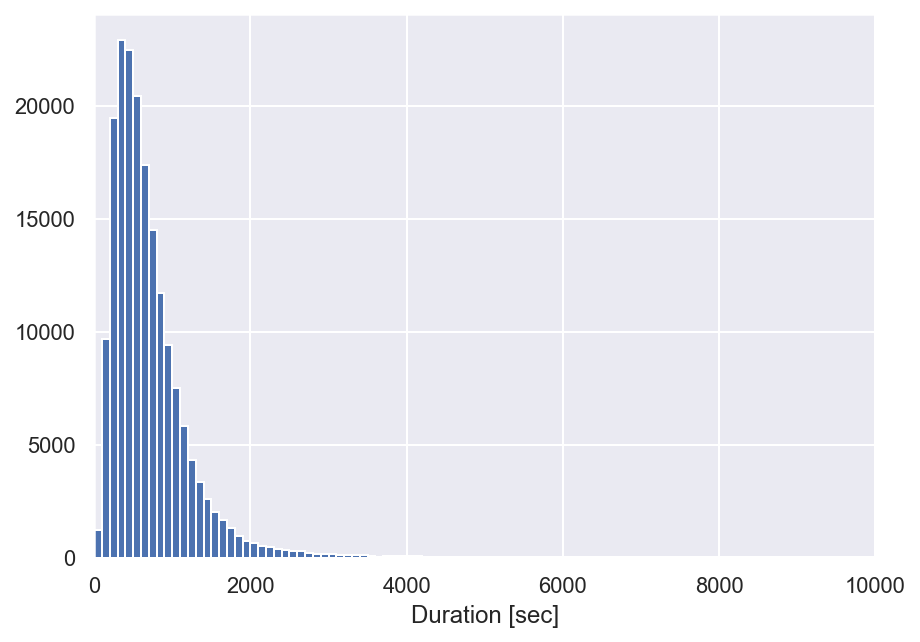

In [7]:
# standard-scale hist plot
plt.figure(figsize=[7, 5])
binsize = 100
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim(0, 1e4)     # set the xlim to left, right
plt.xlabel('Duration [sec]');

> It is very difficult to see and conclude from the standard-scale histogram above since there is a long tail. Let's use log scale for better visibility!

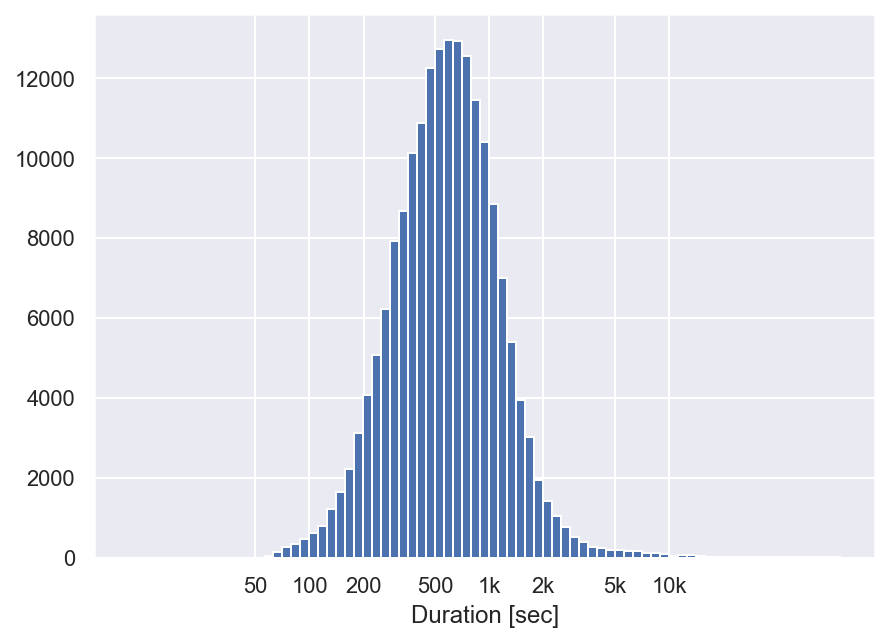

In [8]:
# log-scale histogram shows more data
log_binsize = 0.05
bins = 10 ** np.arange(1, np.log10(df.duration_sec.max())+log_binsize, log_binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], [50, 100, 200, 500, '1k', '2k', '5k', '10k'])
plt.xlabel('Duration [sec]');

> The histogram shows that most of the users, have an use duration of ~600 seconds or 10 min. Some users have used the bikes for as little as 1 min and as long as 86 ksec or 24 hrs.

> Let's look at the **user_type** column and see what percentage of the users are “Subscriber” = Member or “Customer” = Casual.

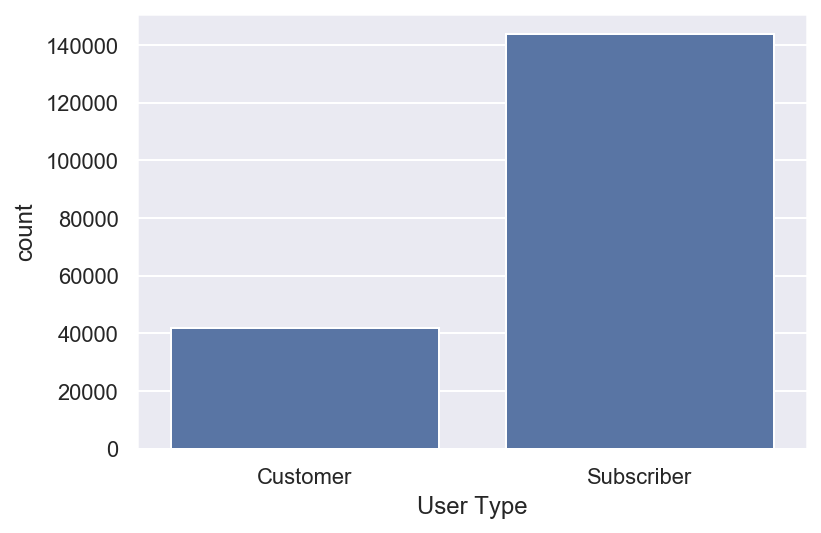

In [9]:
#We can use countplot from seaborn library to visualize user type
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = df.user_type, color = default_color);
plt.xlabel('User Type');

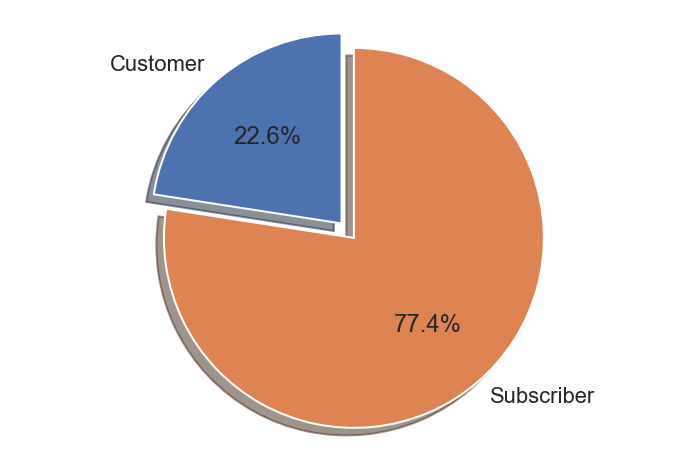

In [10]:
#We can make it a bit more interesting by looking at a pie chart instead and include the percentage on the plot.
labels = 'Customer', 'Subscriber'
sizes = [df.query('user_type == "Customer"')['user_type'].count(), \
         df.query('user_type == "Subscriber"')['user_type'].count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Subscriber')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio

> The above pie chart shows that 77.4% of the users are members and the rest use the bike share casually.

> Now let's look at **bike_share_for_all_trip** column and see what percentage of the users use bike share for their entire trip.

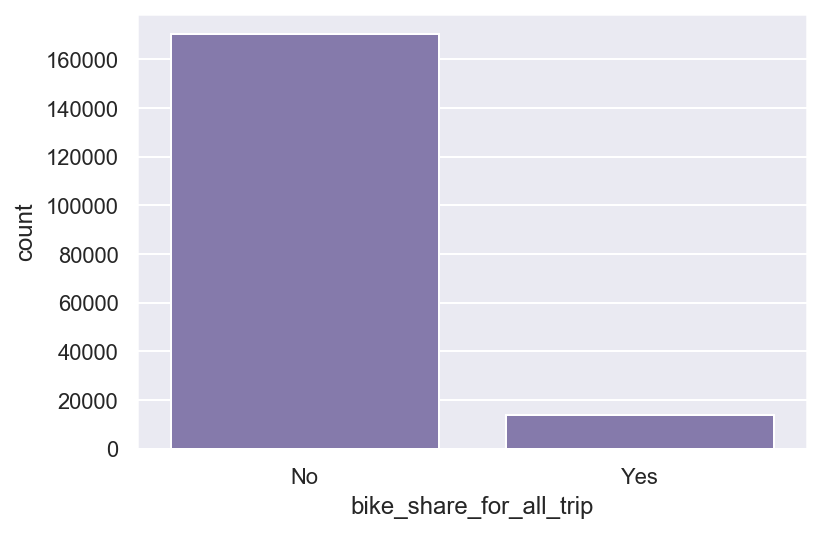

In [11]:
#We can use countplot from seaborn library to visualize
default_color = sns.color_palette()[4]
sns.countplot(data = df, x = df.bike_share_for_all_trip, color = default_color);

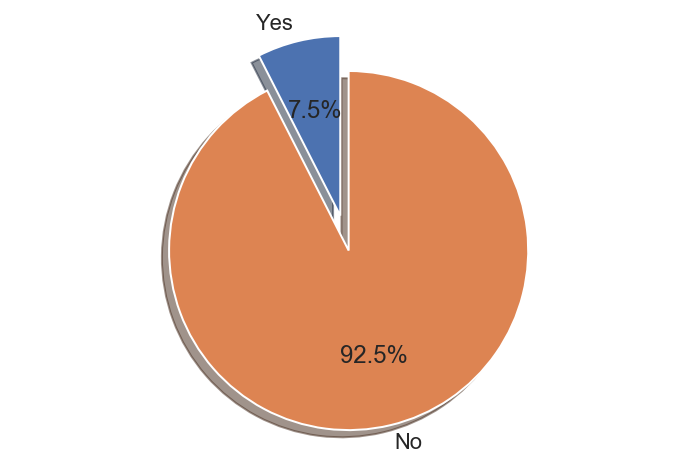

In [12]:
#We can make it a bit more interesting by looking at a pie chart instead and include the percentage on the plot.
labels = 'Yes', 'No'
sizes = [df.query('bike_share_for_all_trip == "Yes"')['bike_share_for_all_trip'].count(), \
         df.query('bike_share_for_all_trip == "No"')['bike_share_for_all_trip'].count()]
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio

> The above pie chart shows that only 7.5% of the users use bike share for their entire trip.

> Now let's look at the **distance traveled**. To enable that, we need to look at the start and stop latitude and longitude. Let's use Haversine [1] and some math to turn the degrees into distance in m.<br>
[1] https://en.wikipedia.org/wiki/Haversine_formula

In [13]:
#Earth's means radius in meters
R = 6371e3 

#define a function to return the distance between 2 sets of longitude and latitude. Latitude, phi, and longitude, lambda, are in degrees
#The function return the distance in meters

def f(phi1, lambda1, phi2, lambda2): 
    Dphi = np.radians(phi2)-np.radians(phi1)
    Dlambda = np.radians(lambda2)-np.radians(lambda1)
    a = np.sin(Dphi/2)**2+np.cos(phi1)*np.cos(phi2)*np.sin(Dlambda/2)**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R*c
    return d

In [14]:
# Add a columns in the DataFrame and with 'travel_dist' label that contains data on distance travelled based on start and end longitude and latitudes
df['travel_dist'] = f(df.start_station_latitude,df.start_station_longitude, df.end_station_latitude,df.end_station_longitude)

In [15]:
# let's see if we have any unreasonable lati/longit.
df.query('start_station_latitude == 0.0 | start_station_longitude == 0.0')['end_station_latitude'].count(), df.query('end_station_latitude == 0.0 | end_station_longitude == 0.0')['end_station_latitude'].count()

(11, 29)

In [16]:
#make a new DF to eliminate those rows with 0.0!
df2 = df[(df.end_station_latitude != 0.0) & (df.end_station_longitude != 0.0) &(df.start_station_latitude != 0.0) & (df.start_station_longitude != 0.0)]

In [17]:
df2.shape, df.shape # inspect the shape to make sure the rows are eliminated

((185456, 16), (185496, 16))

In [18]:
df2.travel_dist.max()

18497.742342583668

In [19]:
df2.loc[df2.travel_dist == df2.travel_dist.max()] #which row has the max distance traveled?

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,travel_dist
133935,2320,2019-11-07 18:31:45.1850,2019-11-07 19:10:26.0310,119.0,18th St at Noe St,37.761047,-122.432642,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,1142,Subscriber,No,NaN,18497.742343


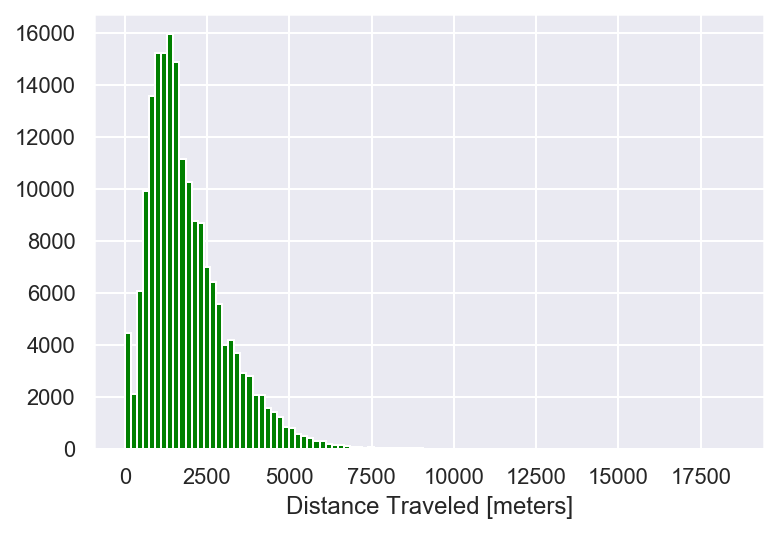

In [20]:
#let's look at the standard-scale histogram
plt.hist(data = df2, x = 'travel_dist', bins = 100,color = 'green');
plt.xlabel('Distance Traveled [meters]');

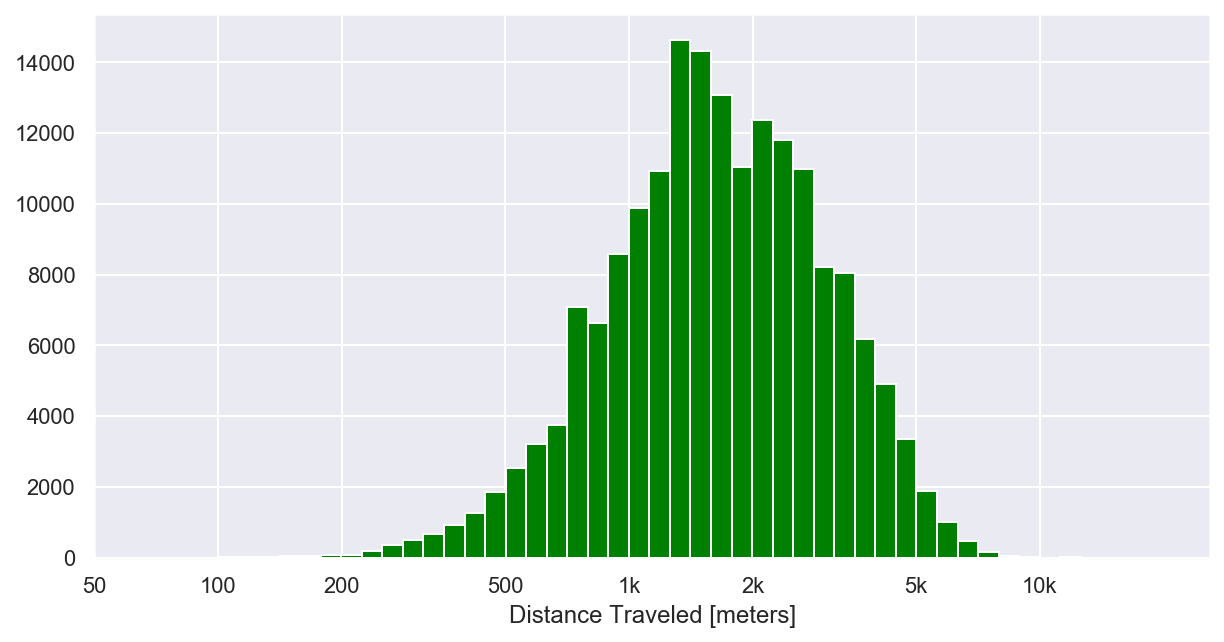

In [21]:
# log-scale histogram shows better visualization
log_binsize = 0.05
bins = 10 ** np.arange(2, np.log10(df2.travel_dist.max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df2, x = 'travel_dist', bins = bins, color = 'green')
plt.xscale('log')
plt.xticks([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], [50, 100, 200, 500, '1k', '2k', '5k', '10k'])
plt.xlabel('Distance Traveled [meters]');

> It looks like most users traveled an average of 1.5-2 km in this month.

In [22]:
df2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,travel_dist
0,707,2019-11-30 23:54:47.2970,2019-12-01 00:06:34.3780,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,12077,Customer,No,NaN,1829.726926
1,2649,2019-11-30 23:18:36.2890,2019-12-01 00:02:45.5790,440.0,Carl St at Cole St,37.765910,-122.449257,13.0,Commercial St at Montgomery St,37.794231,-122.402923,10322,Subscriber,Yes,NaN,6023.512971


### Bivariate exploration

> Let's look at correlation plots. The only meaningful quantitative variables are the time duration and traveled distance. Let's look at those.

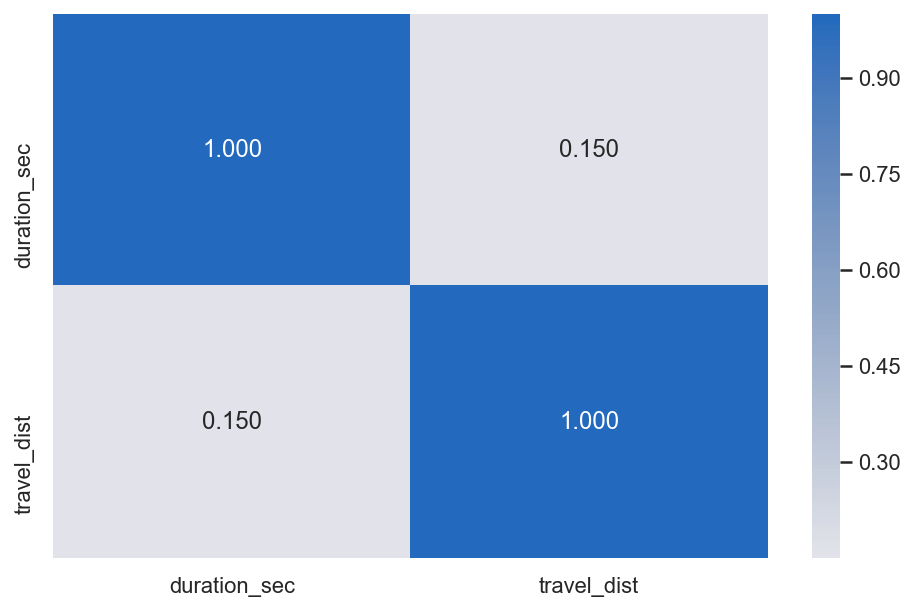

In [23]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df2[['duration_sec', 'travel_dist']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

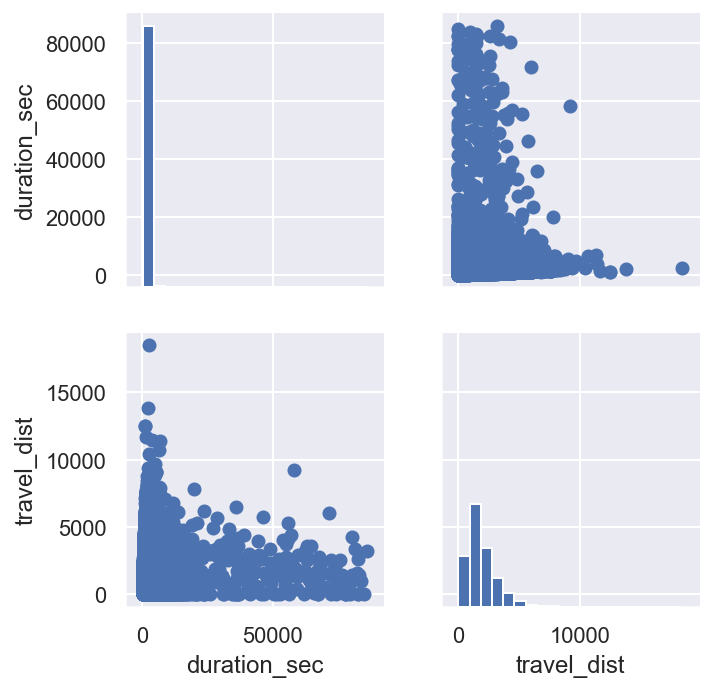

In [24]:
g = sns.PairGrid(data = df2, vars = ['duration_sec', 'travel_dist'])
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

> Let's look at one of the scatter plots in more detail.

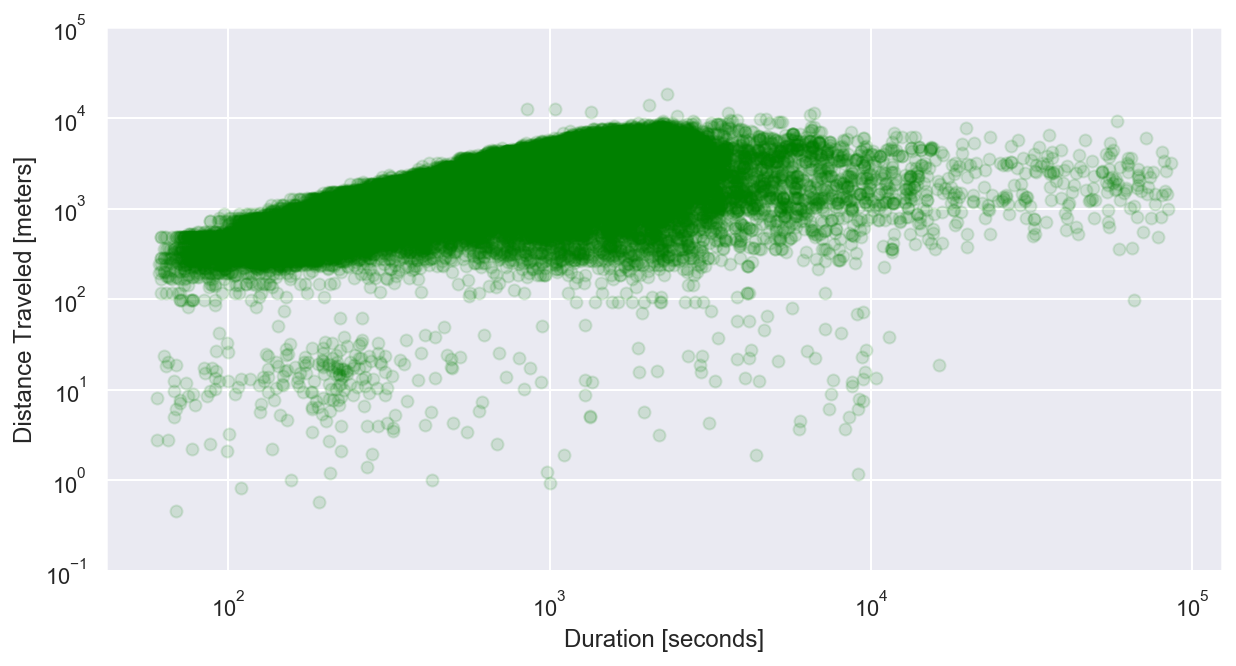

In [25]:
plt.figure(figsize=[10, 5])
plt.scatter(data = df2, x = 'duration_sec', y = 'travel_dist', alpha = 1/8, color = 'green')
plt.ylim([0.1,10**5])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Distance Traveled [meters]')
plt.xlabel('Duration [seconds]');

> From the above plots there is just a bit of correlation between the ditance traveled and the duration when put in the log scale. This suggestions that, although weak, the speed at which the users travel are somewhat correlated.

> Let's look at some **quantitative** vs **categorial** data. Namely `user_type` and `bike_share_for_all_trip`

- lets compare distance tranveled for both types of users

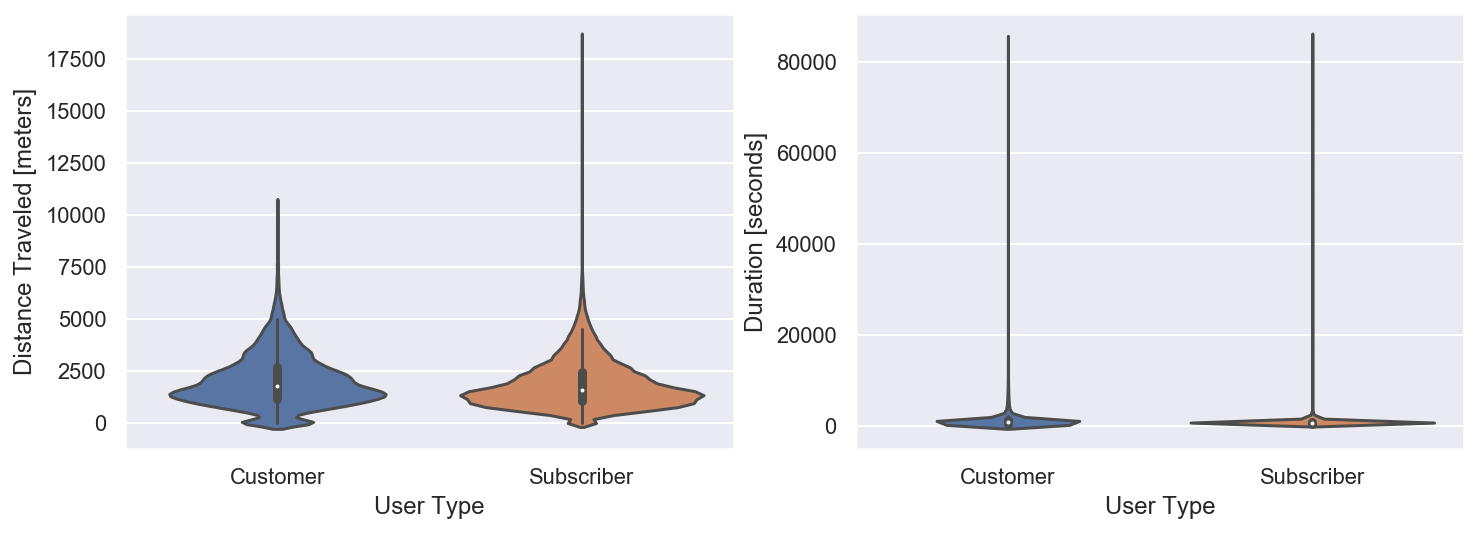

In [26]:
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [12,4])

sns.violinplot(data = df2, x = 'user_type', y = 'travel_dist', ax = ax[0])
sns.violinplot(data = df2, x = 'user_type', y = 'duration_sec', ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Distance Traveled [meters]');
ax[1].set_xlabel('User Type')
ax[1].set_ylabel('Duration [seconds]');

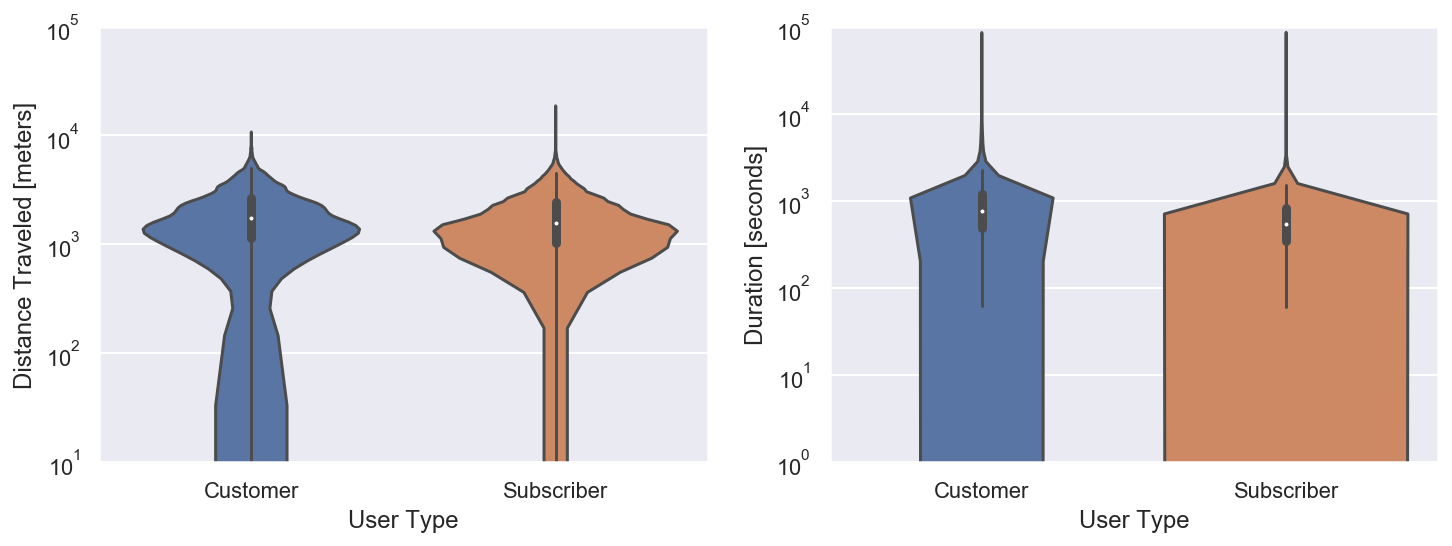

In [27]:
#Let's also look at the log scale version for better visulaization
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [12,4])
sns.violinplot(data = df2, x = 'user_type', y = 'travel_dist', ax = ax[0])
sns.violinplot(data = df2, x = 'user_type', y = 'duration_sec', ax = ax[1])

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylim([10, 10**5])
ax[1].set_ylim([1, 10**5])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Distance Traveled [meters]');
ax[1].set_xlabel('User Type')
ax[1].set_ylabel('Duration [seconds]');

> The distance traveled and the duration can be very small. Thus the tail of the violin plots are very stretched. <br>
> The two box plots essentially reveal that there is much more variation in `Subscriber` user-type with distance travelled median almost the same for both user types. The large distance travelled variation for `Subscriber` was not surprising since 77.4% of the user type data are subscribers.<br>
> The duration for `Subscriber` has a lower median than `Customer` and almost the same variation. However, the lateral size of the violin plot expresses that there is a lot more `Subscriber`with duration of about 100-1000 seconds compared with `Customer`.

>Let's do the same analysis for **bike_share_for_all_trip**.

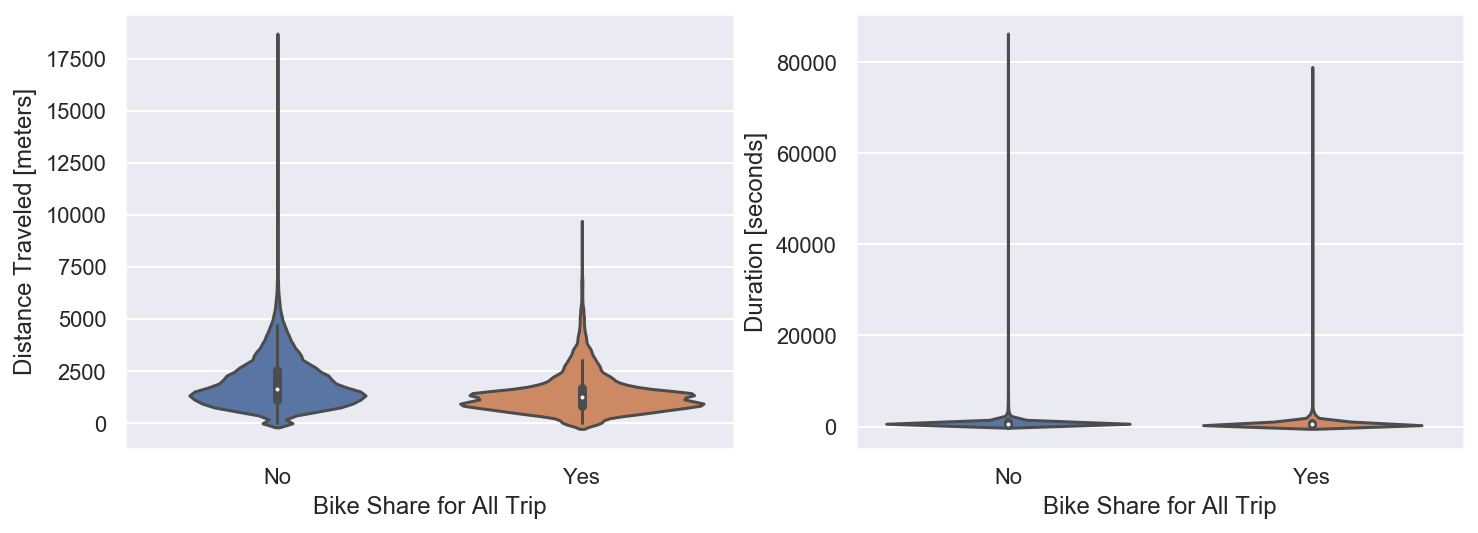

In [28]:
#Let's also look at the log scale version for better visulaization
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [12,4])
sns.violinplot(data = df2, x = 'bike_share_for_all_trip', y = 'travel_dist', ax = ax[0])
sns.violinplot(data = df2, x = 'bike_share_for_all_trip', y = 'duration_sec', ax = ax[1])

ax[0].set_xlabel('Bike Share for All Trip')
ax[0].set_ylabel('Distance Traveled [meters]');
ax[1].set_xlabel('Bike Share for All Trip')
ax[1].set_ylabel('Duration [seconds]');

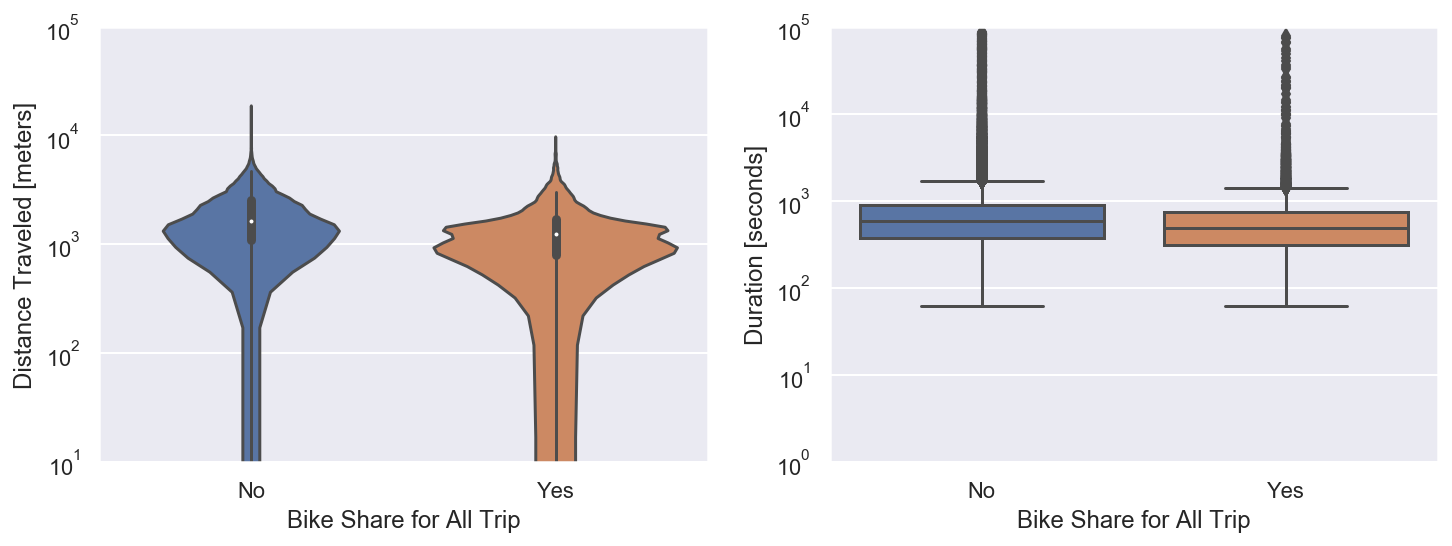

In [29]:
#Let's also look at the log scale version for better visulaization
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [12,4])
sns.violinplot(data = df2, x = 'bike_share_for_all_trip', y = 'travel_dist', ax = ax[0])
sns.boxplot(data = df2, x = 'bike_share_for_all_trip', y = 'duration_sec', ax = ax[1])

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylim([10, 10**5])
ax[1].set_ylim([1, 10**5])
ax[0].set_xlabel('Bike Share for All Trip')
ax[0].set_ylabel('Distance Traveled [meters]');
ax[1].set_xlabel('Bike Share for All Trip')
ax[1].set_ylabel('Duration [seconds]');

> The conclusion from the last two plot is that the distance traveled for most of the users who use bike share for all the trip, is around 1km where are it is more spread out for those who do not use bike share for all trip. Furthermore, the median of the distance traveled for the latter case is higher than the former case. Keep in mind that 92.5% of the users do NOT use bike share for all trip. <br>
> The users who do not use bike share for entire trip, on average spend longer time biking that those who do. This may mean that there is a small fraction of users that use bike share to get to their destination because their destination is very close to the starting point or they generally bike faster. 

### Multivariate exploration

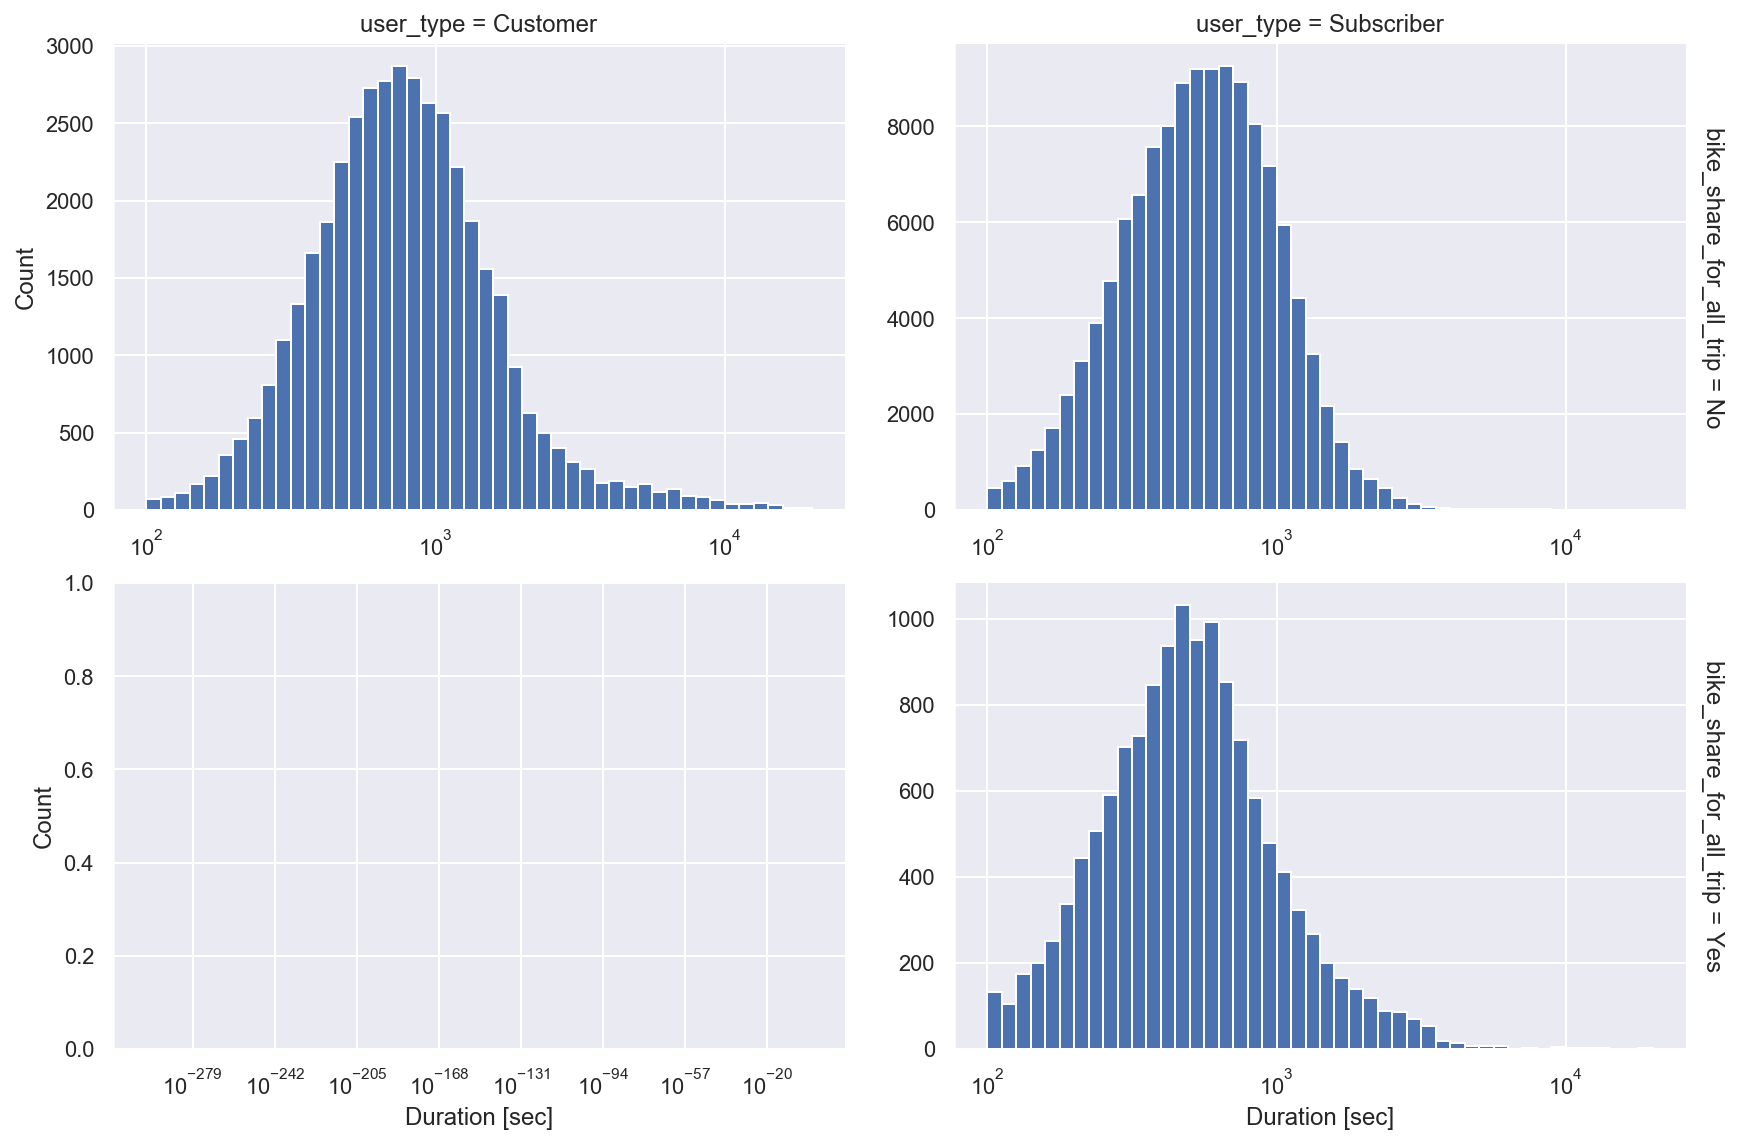

In [30]:
# 
g = sns.FacetGrid(data = df2, col = 'user_type', row = 'bike_share_for_all_trip', height=4, aspect=1.5,sharex=False,sharey=False, margin_titles = True)
log_binsize = 0.05
bins = 10 ** np.arange(2, np.log10(df2.travel_dist.max())+log_binsize, log_binsize)
g.map(plt.hist, 'duration_sec', bins = bins).set(xscale = 'log')
g.set_ylabels('Count').set_xlabels('Duration [sec]');

> Firstly, all the `Customers` **DO** bike share for their entire trip. Thus, there is no data available for the 3rd quadrant on the plot above.  We can double check that using the code below.

In [31]:
(df2.query('user_type == "Customer"')['bike_share_for_all_trip'] == 'Yes').sum()

0

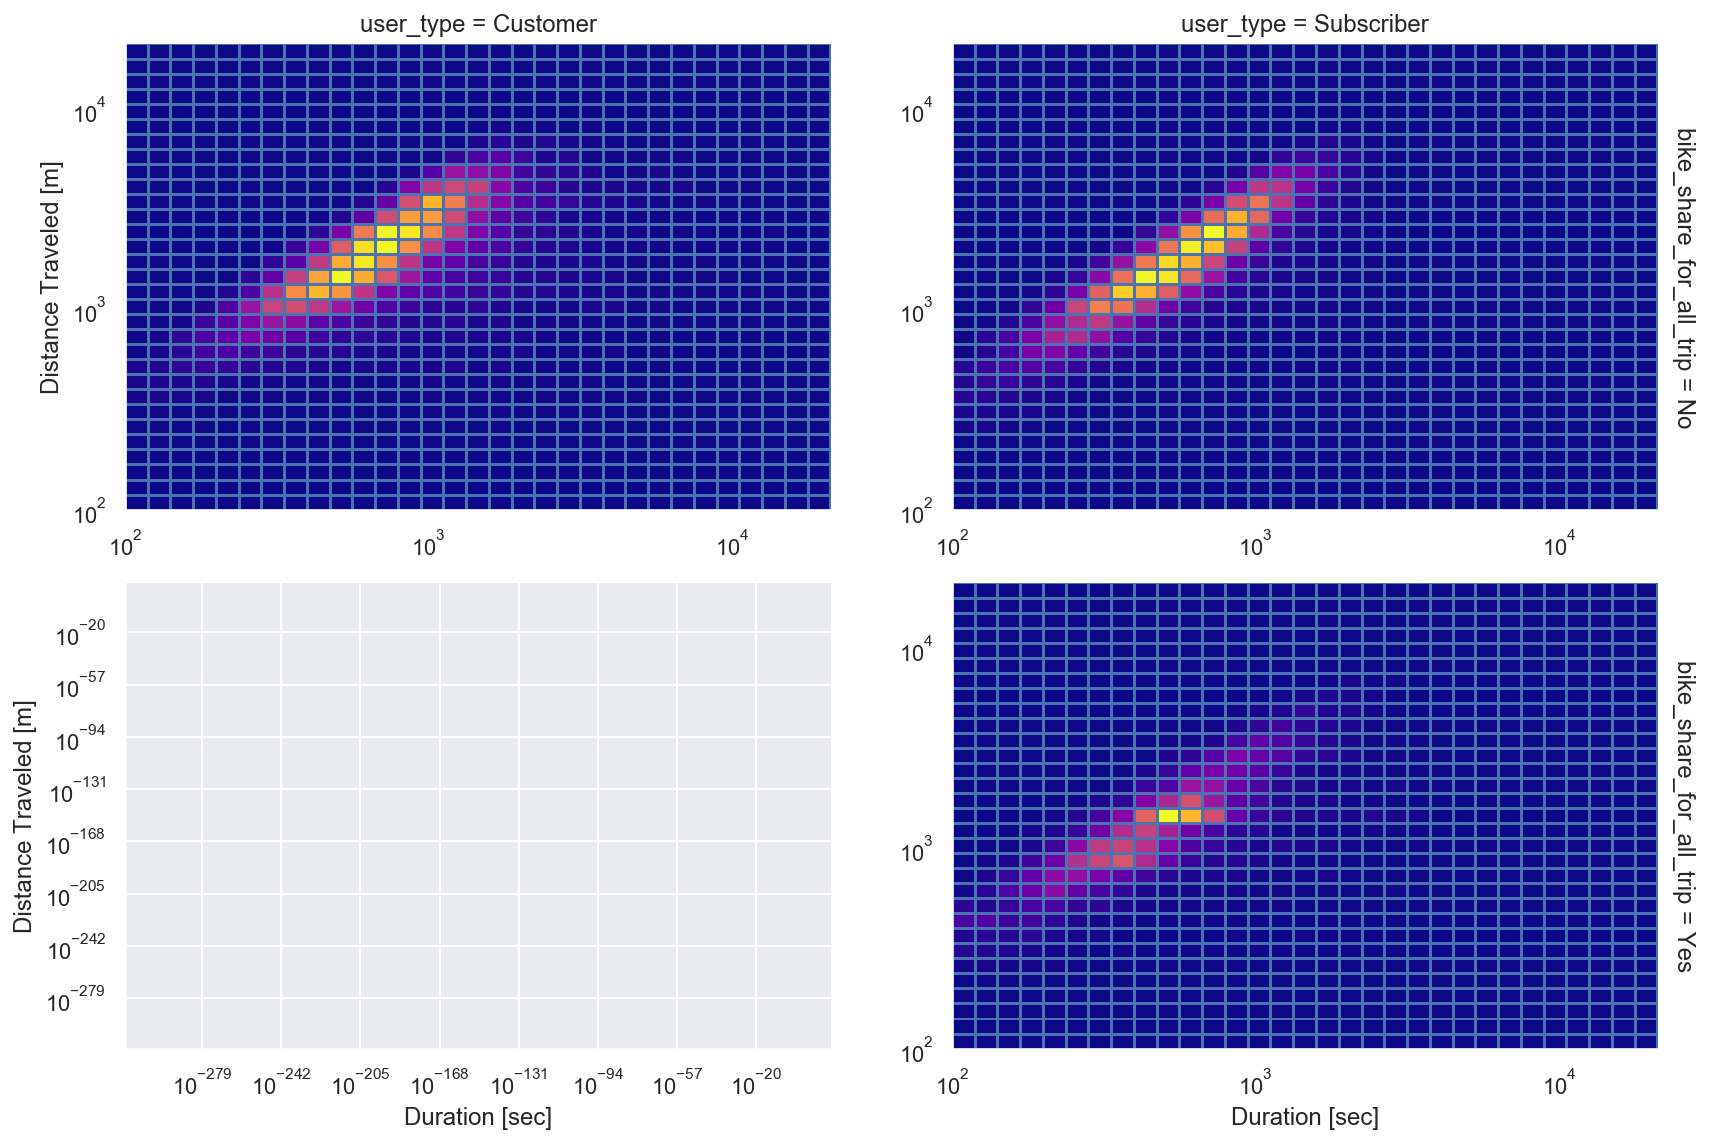

In [32]:

sns.axes_style({'axes.grid': False})
g = sns.FacetGrid(data = df2, col = 'user_type', row = 'bike_share_for_all_trip', height=4, aspect=1.5, sharex=False,sharey=False, margin_titles = True)

log_binsize = 0.075
bins = 10 ** np.arange(2, np.log10(df2.travel_dist.max())+log_binsize, log_binsize)
g.map(plt.hist2d, 'duration_sec', 'travel_dist', bins = bins, cmap = 'plasma').set(xscale = 'log').set(yscale = 'log')
g.set_xlabels('Duration [sec]').set_ylabels('Distance Traveled [m]');

> The above plot on the `FacetGrid` essentially show the correlation between distance traveled and the duration in log scale. for those who are not using bike share for the entire trip and are subscribers, the correlation seems to be the strongest and is the weakest for the subscribers who do not use bike share for their entire trip.